# Analyze and build a classifier based on Airlines passengers satisfaction 

## Dataset:
The dataset contains an airline passenger satisfaction survey on one of the US airlines, and it was taken from Kaggle through this link: https://www.kaggle.com/johndddddd/customer-satisfaction

 
## objectives:
The objectives of this project is to analyze the dataset and get to know what factors lead to customer satisfaction for an Airline by answering the following:

1. What is the total number of satisfied and unsatisfied passengers?
2. What is the satisfaction rate with respect to Gender, Type of Travel, Class, and customer type?
3. Is there high relationship between any two columns?

At the end of this project, we will try to build a machine learning model to predict the passenger satisfaction using Logistic Regression from Scikit-learn

 

## 1. Import requried libraries:
In this section we should import all needed Python libraries for this project

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# Use dark style for seaborn plots
sns.set_style("dark")
# Use PuBu palette for seaborn plots
palette = 'PuBu'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pickle

## 2. Reading and understand the dataset:
In this section, we will look at the dataset and understand it

### 2.1 Read the dataset using pandas library 

In [2]:
dataset = pd.read_csv('dataset.csv')

### 2.2 Get the first 5 records

In [3]:
dataset.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### 2.3 Display all columns and their type

In [4]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

### 2.4 Get the number of missing values

In [5]:
dataset.isna().sum() 

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### 2.5 Get the number of duplicate rows

In [6]:
dataset.duplicated().sum() 

0

## 3. Data Preparation:
In this preparation secion, we will prepare and clean the dataset for the analysis stage

### 3.1 Rename the Satisfaction columns

In [7]:
dataset.rename(columns={'satisfaction_v2':'Satisfaction'}, inplace=True)

### 3.2 Fill the missing values in Arrival Delay with zero

In [8]:
dataset['Arrival Delay in Minutes'].fillna(0, inplace=True) 

### 3.3 Convert the Flight Distance from miles to Kilos

In [9]:
dataset['Flight Distance'] = dataset['Flight Distance']*1.609

### 3.4 Move Satisfaction column to the end of the dataset

In [10]:
column = dataset.pop('Satisfaction')
dataset.insert(len(dataset.columns), 'Satisfaction', column)

### 3.5 Check the null values

In [11]:
dataset.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

### 3.6 Get the first 5 records after cleaning

In [12]:
dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,11112,Female,Loyal Customer,65,Personal Travel,Eco,426.385,0,0,0,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,110278,Male,Loyal Customer,47,Personal Travel,Business,3964.576,0,0,0,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,103199,Female,Loyal Customer,15,Personal Travel,Eco,3440.042,0,0,0,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,47462,Female,Loyal Customer,60,Personal Travel,Eco,1002.407,0,0,0,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,120011,Female,Loyal Customer,70,Personal Travel,Eco,569.586,0,0,0,...,2,2,0,2,4,2,5,0,0.0,satisfied


## 4. Data Analysis:
In this analysis section, we will answer the main questions with some visualizations

### 4.1 Questions and Answers

#### A) What is the total number of satisfied and unsatisfied passengers?

Text(0.5, 0, 'Satisfaction')

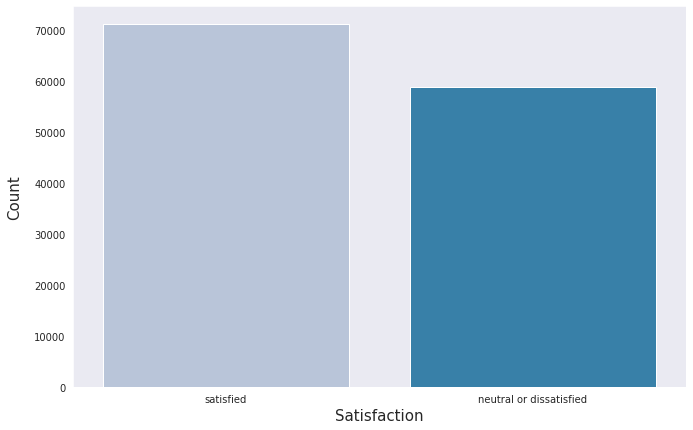

In [13]:
plt.figure(figsize=(11, 7))
sns.countplot(x='Satisfaction', data=dataset, palette=palette)
plt.ylabel('Count', fontsize=15, labelpad=12)
plt.xlabel('Satisfaction', fontsize=15)

#### Explanation:
As it is shown in the plot above that the satisfied passengers are more than the dissatisfied passengers. Approximately, 70K satisfied passengers and 60K unsatisfied passengers.

### B) What is the satisfaction rate with respect to Gender, Type of Travel, Class, and customer type?

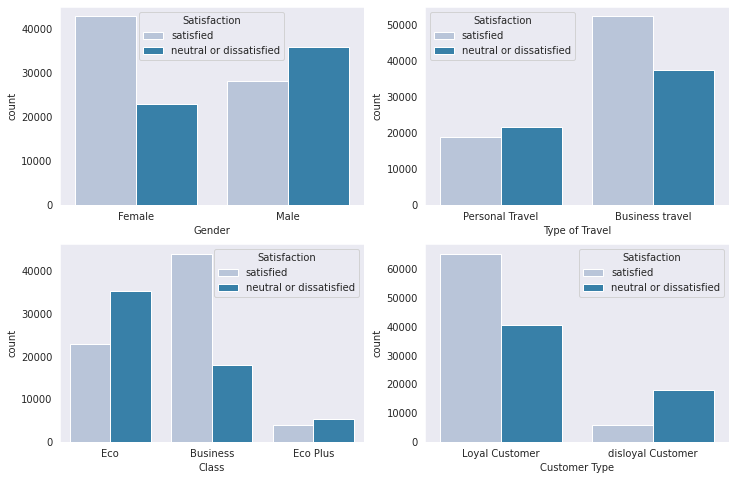

In [14]:
categorical_columns = ['Gender', 'Type of Travel', 'Class', 'Customer Type']

plot, plot_map = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plot_map = plot_map.ravel()

for index, column in enumerate(categorical_columns):
    plt.subplot(2, 2, index+1)
    plot_map[index] = sns.countplot(x=column, hue='Satisfaction', data=dataset, palette=palette)

### Explanation:
In the plots above, we can extract interesting facts as following:
1. The female satisfaction rate is not equal to males. Satisfied females are more than males, as well as unsatisfied females are less than unsatisfied males.
2. The passengers of business travel type are having high satisfied rate which is more than the personal travel type.
3. Business-class has a positive satisfaction rate than others 
4. Disloyal customers are mostly unsatisfied unlike Loyal customers

### C) Is there high relationship between any two columns?

In [15]:
dataset.corr()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.020322,0.054986,-0.019559,0.001293,0.012607,0.000669,-0.000384,0.054693,0.054023,0.000830,0.055978,0.042325,0.074625,0.082644,0.080834,0.025328,-0.017643,-0.035405
Age,0.020322,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011206
Flight Distance,0.054986,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.109733
Seat comfort,-0.019559,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025463
Departure/Arrival time convenient,0.001293,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002500
Food and drink,0.012607,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014845
Gate location,0.000669,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003620
Inflight wifi service,-0.000384,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035198
Inflight entertainment,0.054693,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033182
Online support,0.054023,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.035940


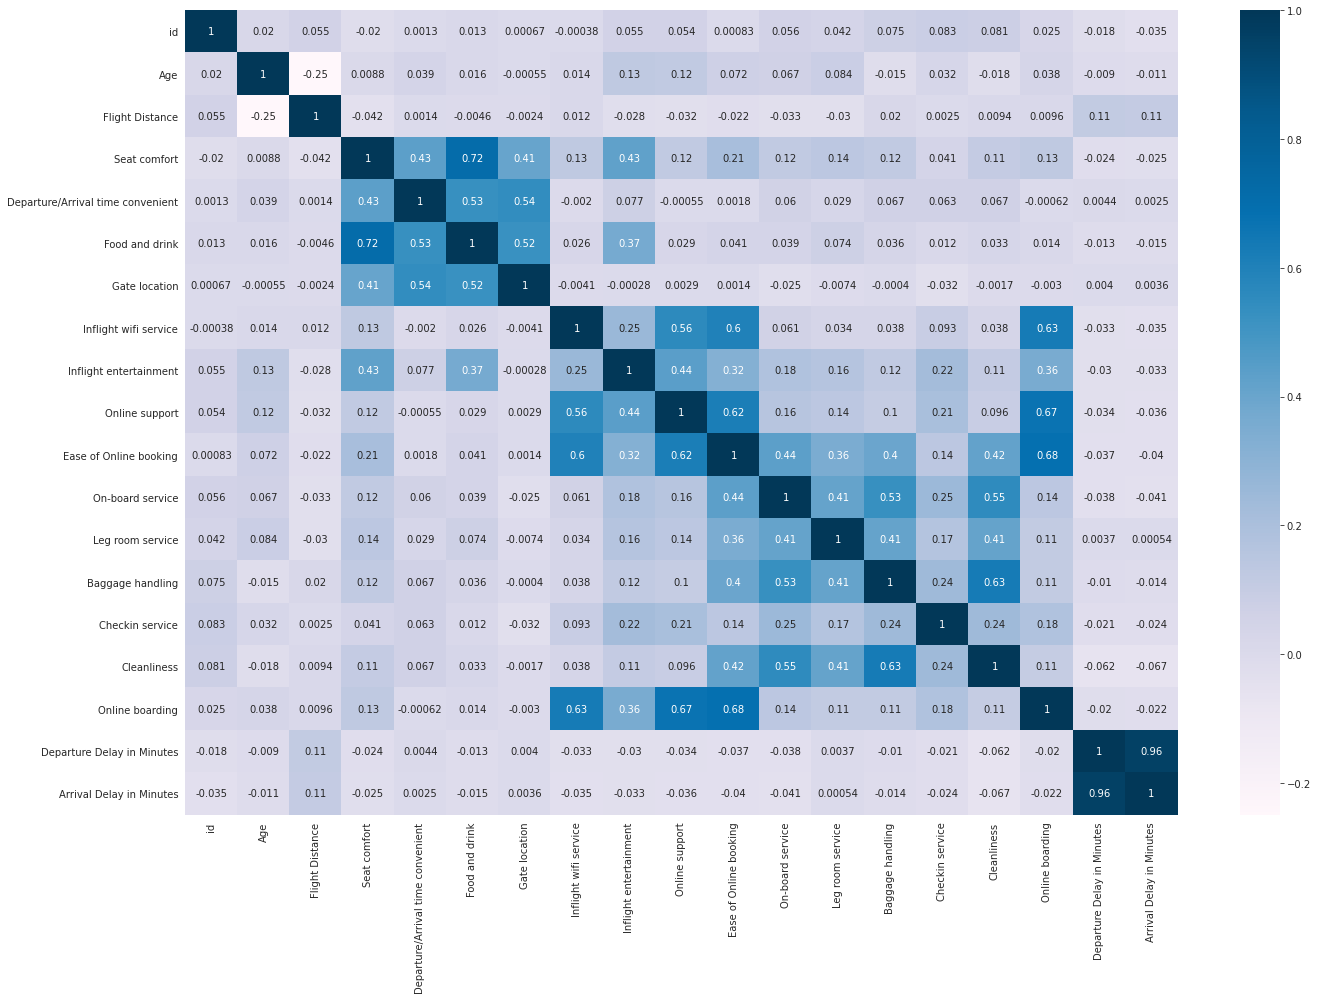

In [16]:
plt.figure(figsize=(20, 14))
sns.heatmap(dataset.corr(), cmap=palette, annot=True)
plt.tight_layout()

### Explanation:
By following the map above we can see that there is only one strong relationship between two columns which are the Arrival Delay in Minutes and Departure Delay in Minutes with 0.96. There are many intermediate ones such as Seat Comfort and food and drink with 0.72. Positve relationship means that if column A goes up, then B most likely will go up as well, and the opposite with the negative relationship.

### 4.2 Summary of the analysis:
In this section we found many interesting points such as that the satisfied passengers are more than the dissatisfied. We aslo found that females have positve satisfaction rate unlike males, and passengers of business travel type and Business-class are having highest satisfied rate, as well as disloyal customers are mostly unsatisfied unlike Loyal customers.

## 5. Modeling: 

### 5.1 Get all unique types of categorical columns

In [17]:
print("{}: {}".format('Satisfaction', dataset['Satisfaction'].unique()))
print("{}: {}".format('Gender', dataset['Gender'].unique()))
print("{}: {}".format('Customer Type', dataset['Customer Type'].unique()))
print("{}: {}".format('Type of Travel', dataset['Customer Type'].unique()))
print("{}: {}".format('Class', dataset['Customer Type'].unique()))

Satisfaction: ['satisfied' 'neutral or dissatisfied']
Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Loyal Customer' 'disloyal Customer']
Class: ['Loyal Customer' 'disloyal Customer']


### 5.2 Change all the value from strings to integers

In [18]:
dataset['Satisfaction'] = dataset['Satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})
dataset['Gender'] = dataset['Gender'].replace({'Male':0, 'Female':1})
dataset['Customer Type'] = dataset['Customer Type'].replace({'disloyal Customer':0, 'Loyal Customer':1})
dataset['Type of Travel'] = dataset['Type of Travel'].replace({'Personal Travel':0, 'Business travel':1})
dataset['Class'] = dataset['Class'].replace({'Eco':0, 'Business':1, 'Eco Plus':2})

### 5.3 Get the first 5 records after cleaning

In [19]:
dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,11112,1,1,65,0,0,426.385,0,0,0,...,3,3,0,3,5,3,2,0,0.0,1
1,110278,0,1,47,0,1,3964.576,0,0,0,...,3,4,4,4,2,3,2,310,305.0,1
2,103199,1,1,15,0,0,3440.042,0,0,0,...,2,3,3,4,4,4,2,0,0.0,1
3,47462,1,1,60,0,0,1002.407,0,0,0,...,1,1,0,1,4,1,3,0,0.0,1
4,120011,1,1,70,0,0,569.586,0,0,0,...,2,2,0,2,4,2,5,0,0.0,1


### 5.4 Drop unwanted columns


In [20]:
dataset.drop(['id', 'Age'], axis=1, inplace=True)

### 5.5 Split the dataset into training and testing sets


In [21]:
features = dataset.drop(['Satisfaction'], axis=1)
target = dataset['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=88)

### 5.6 Create the model


In [22]:
model =  LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000) 

### 5.7 Train the model


In [23]:
model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=10000, tol=0.01)

### 5.8 Test the model 


In [35]:
result = model.score(x_test, y_test)
print('Score: {}%'.format(round(result*100)))

Score: 83.0%


### 5.9 Predict new inputs manually


#### 5.9.1  Create a small test dataset manually

In [25]:
new_people = [
                [0, 1, 1, 1, 2991, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
                [1, 1, 1, 1, 5000, 1, 1, 2, 5, 2, 1, 3, 4, 1, 3, 3, 1, 1, 1, 2, 1]
             ]

# Convert the list to Pandas DataFrame
new_people = pd.DataFrame(data=new_people, columns=x_train.columns)

new_people

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,1,2991,5,5,5,5,4,...,5,5,5,5,5,5,5,5,5,5
1,1,1,1,1,5000,1,1,2,5,2,...,3,4,1,3,3,1,1,1,2,1


#### 5.9.2  Use the machine learning model to do predictions

In [26]:
# predict using the machine learning model we built
results = model.predict(new_people)

# Change all ones and zeros with Satisifed and Unsatisfied 
fixed_results = []
for index, value in enumerate(results):
    if value == 1:
        fixed_results.append('Satisifed')
    else:
        fixed_results.append('Unsatisfied')


# Reshape the list to 1-column
fixed_results = np.array(fixed_results).reshape(-1, 1)

# Convert the predictions as pandas DataFrame
predictions = pd.DataFrame(fixed_results, columns=['Satisfaction'])

# Add the predictions to the small dataset we created
new_people['Satisfaction'] = predictions

new_people

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,0,1,1,1,2991,5,5,5,5,4,...,5,5,5,5,5,5,5,5,5,Satisifed
1,1,1,1,1,5000,1,1,2,5,2,...,4,1,3,3,1,1,1,2,1,Unsatisfied


### 5.10 Save the model


In [27]:
with open("model.pickle", "wb") as f:
    pickle.dump(model, f)